# Acumulative Distributions (ecdf) comparison of samples in a same variable splitted according to cat variable

In [7]:
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# load data

### Iris dataset

In [8]:
from sklearn.datasets import load_iris
# dataset
dataset1 = load_iris()
# data
df1 = pd.DataFrame(dataset1.data, columns = dataset1.feature_names)
df1['target'] = dataset1.target
# display
df1.shape

(150, 5)

### Titanic dataset

In [9]:
# load data
df2 = sns.load_dataset('titanic')
# get categorical columns
cats = ['object', 'category', 'bool', 'datetime64[ns]']
cols_cat_titanic = df2.select_dtypes(include=cats).columns.tolist()
# display
df2.shape

(891, 15)

# PLOTS

In [10]:
## plot distribution of a column
def ecdf(df:pd.DataFrame, column:str, column_group:str, ax:"matplotlib axis")->"matplotlib axis":
    # validation
    assert column in df.columns.tolist(), f"column '{column}' is not available."
    # plot
    ax = sns.ecdfplot(data=df, x=column, hue=column_group, ax = ax)
    # return axis
    return ax


# plot selected columns
def plots_ecdf(df:pd.DataFrame, columns:"list or str", column_group:str, plot_function:"function", num_plots_per_row:int = 3):
    # if columns is only one string    
    if isinstance(columns, str):
        # figsize
        figsize = (10, 10)
        # number of plots in rows / columns
        nrs = ncs = 1
    # if is a list
    elif isinstance(columns, list):
        # number of columns to be ploted
        ncolumns = len(columns)
        # number of plots in rows / columns
        nrs = math.ceil(ncolumns / num_plots_per_row)
        ncs = num_plots_per_row if ncolumns >= num_plots_per_row else ncolumns 
        # figsize
        figsize = (ncs*5, nrs*5)    
    else:
        raise
    # create figure and axis    
    fig, ax = plt.subplots(ncols = ncs, nrows = nrs, figsize = figsize)
    # if axis is an array
    if isinstance(ax, np.ndarray):
        # reshape
        ax = ax.ravel()
        # loop of axis
        for ii, c in enumerate(columns):
            # plot in cells
            _ = plot_function(df, c, column_group, ax[ii])
    # if axis is only one
    else:
        # plots only one
        _ = plot_function(df, columns[0] if len(columns) == 1 else columns, column_group, ax)
    # display plot
    plt.show()

## Analysis: iris dataset

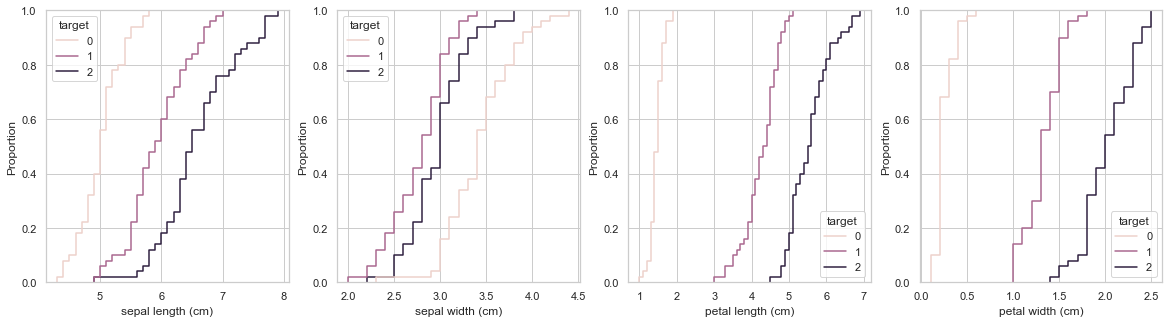

In [11]:
plots_ecdf(df1, dataset1.feature_names, 'target', ecdf, num_plots_per_row = 4)

## Analysis: titanic dataset

In [12]:
cols_cat_titanic

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

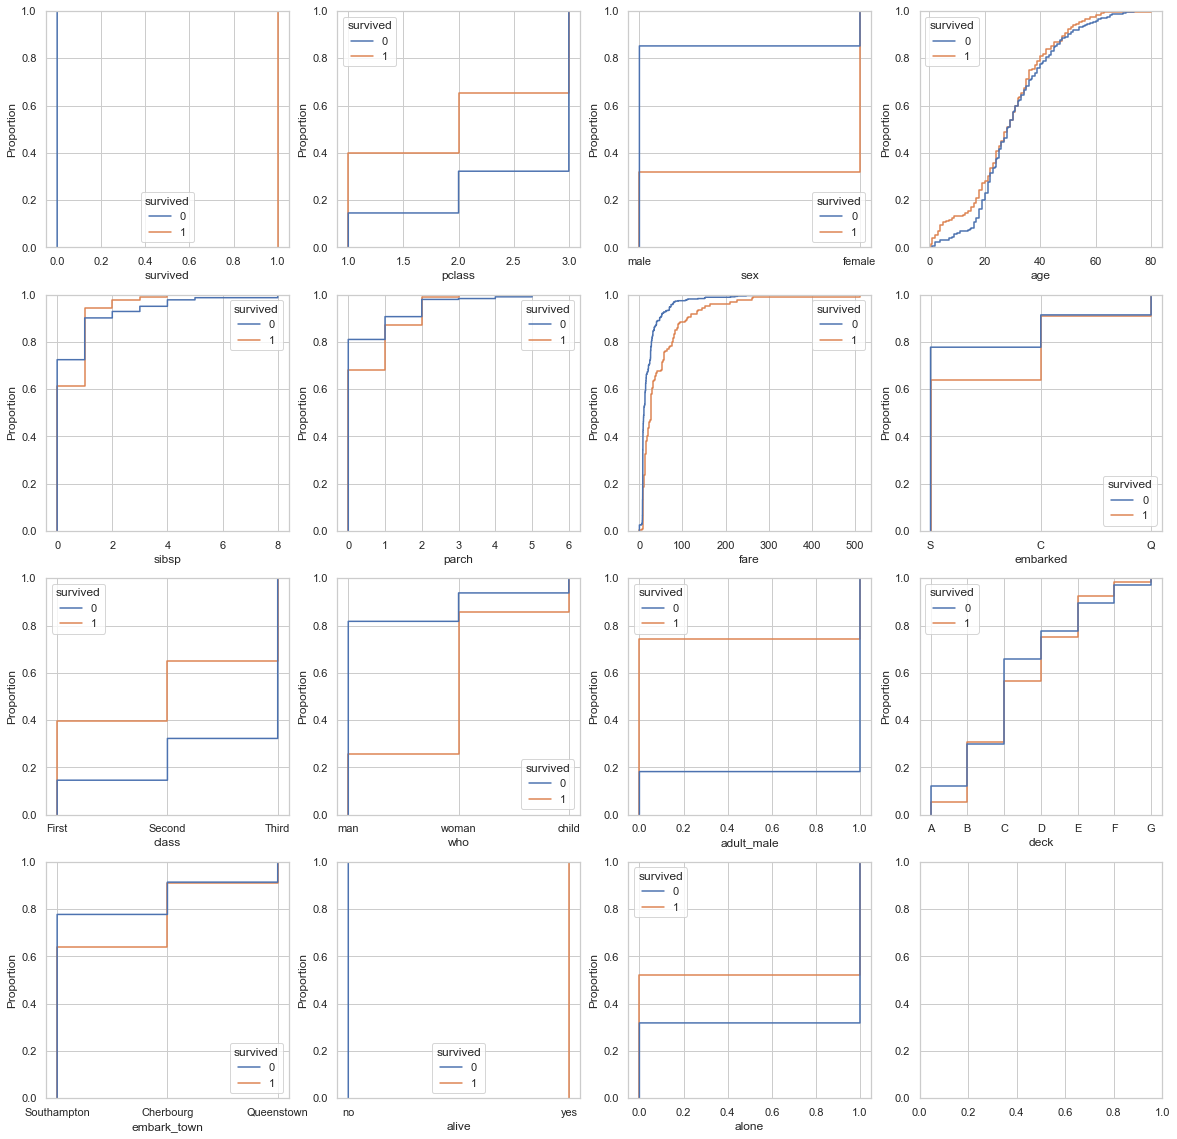

In [13]:
plots_ecdf(df2, df2.columns.tolist(), 'survived', ecdf, num_plots_per_row = 4)